In [22]:
import inspect
import numpy as np
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
get_ipython().magic('matplotlib')
from  mvesc_utility_functions import *

%matplotlib inline

absences = read_table_to_df("all_absences","clean",-1)


Using matplotlib backend: agg


In [3]:
def get_column(column_list, table, schema='clean'):
    """
    Returns a pandas dataframe with student lookup and the given list of columns

    :param list column_list: desired list of columns (student lookup automatically included)
    :rtype: pandas dataframe
    """ 
    with postgres_pgconnection_generator() as connection:
        sqlcmd = ("""select student_lookup, {cols} from {schema}."{table}";"""
            .format_map({'schema':schema,'table': table, 'cols': ', '.join(column_list)}))
        df = pd.read_sql(sqlcmd, connection)
    return df


8080 grads, 373 dropouts, 10439 transfers


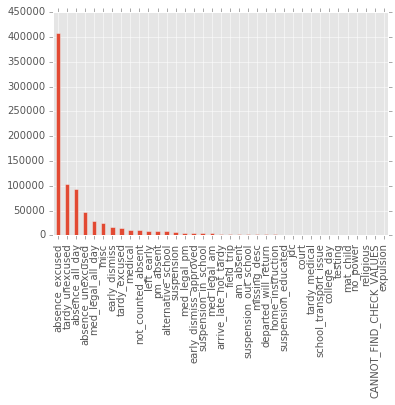

In [6]:
absences['absence_desc'].value_counts().plot(kind='bar')

withdraw_reason = get_column(['withdraw_reason'],'wrk_tracking_students')

withdraws = withdraw_reason[pd.notnull(withdraw_reason['withdraw_reason'])]
dropouts = withdraws[withdraws['withdraw_reason'].str.contains('dropout')]
transfers = withdraws[withdraws['withdraw_reason'].str.contains('transfer')]
graduates = withdraws[withdraws['withdraw_reason'].str.contains('grad')]
print("{0} grads, {1} dropouts, {2} transfers".format(len(graduates.index), len(dropouts.index),len(transfers.index)))

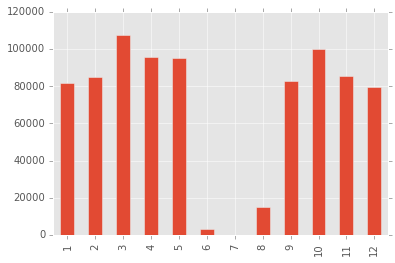

In [26]:
absences['month'].value_counts().reindex(range(1,13)).plot(kind='bar')

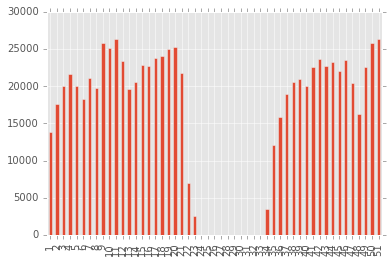

In [25]:
absences['week'].value_counts().reindex(range(1,52)).plot(kind='bar')

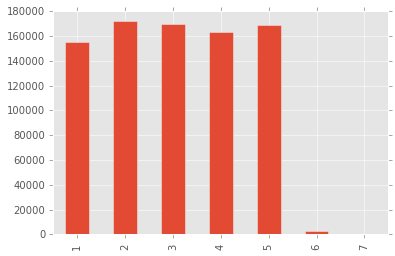

In [28]:
absences['weekday'].value_counts().reindex(range(1,8)).plot(kind='bar')

In [5]:
# will update to with statements once utility module is updated
connection = postgres_pgconnection_generator()
cursor = connection.cursor()


cursor.close()
connection.close()